In [76]:
import cv2
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
import sklearn.utils.multiclass as multiclass

import seaborn as sn

import pandas as pd

%matplotlib inline

import os
import os.path as path

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 100

labels = np.array(["background", "hard exudate", "haemorrhage", "soft exudate", "micro-aneurysm"])

In [77]:
def vectorise(image):
    return np.array(image.flatten(), dtype=np.uint8)

In [78]:
def classify(vec):
    
    label_vec = np.take(labels, vec)
    
    return label_vec

In [79]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    # classes = classes[multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    ax.set_ylim(len(cm)-0.5, -0.5)
    fig.tight_layout()
    return fig

In [111]:
import pickle as pkl

def evaluate(result_set, location, number):
    st = 16
    y_true = classify(vectorise(result_set["truth"][st:st+225,st:st+225]))
    y_pred = classify(vectorise(result_set["pred"]))
    fig = plot_confusion_matrix(y_true, y_pred, labels, title="Classification")
    fig.savefig(os.path.join(location, f"{number}.png"))
    

def get_metrics(result_set, labels):
    st = 16
    y_true = classify(vectorise(result_set["truth"][st:st+225,st:st+225]))
    y_pred = classify(vectorise(result_set["pred"]))
    
    results = {}
    
    
    predicted = np.unique(np.hstack((np.unique(y_true), np.unique(y_pred))))
    print(predicted)
    remaining_labels = []
    
    cm = metrics.confusion_matrix(y_true, y_pred)
    for i, label in enumerate(predicted):
        TP = cm[i,i]
        FP = cm[:,i].sum() - TP
        TN = cm.sum() - cm[:,i].sum() - cm[i,:].sum() + TP
        FN = cm[i,:].sum() - TP
        
        print(TP, FP, TN, FN)
        
        tot = cm.sum()
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        results[label] = {
            "precision": precision,
            "recall": recall,
            "accuracy": (TP + TN)/(tot)
        }
    return results

In [127]:
results_per_image = []

for i in range(20):
    location = "outputs/task2/crossentropy"
    
    with open(path.join(location, f"test{i}_crossentropy_1streak10epochs.sav"), "rb") as saved:
        result_dict = pkl.load(saved)
        # evaluate(result_dict, location, i)
        dict_m = get_metrics(result_dict, ["background", "soft exudates"])
        results_per_image.append(dict_m)

print("Done!")

['background' 'hard exudate']
41765 2521 5572 767
5572 767 41765 2521
['background' 'hard exudate']
41122 2963 5995 545
5995 545 41122 2963
['background' 'hard exudate']
41435 4035 4709 446
4709 446 41435 4035
['background' 'hard exudate']
41874 3075 5159 517
5159 517 41874 3075
['background' 'hard exudate']
41829 3902 4553 341
4553 341 41829 3902
['background' 'hard exudate']
41359 4024 4843 399
4843 399 41359 4024
['background' 'hard exudate']
41980 3245 4946 454
4946 454 41980 3245
['background' 'hard exudate']
42445 3566 4202 412
4202 412 42445 3566
['background' 'hard exudate']
42754 3310 4155 406
4155 406 42754 3310
['background' 'hard exudate']
42354 2930 4743 598
4743 598 42354 2930
['background' 'hard exudate']
41640 3170 5107 708
5107 708 41640 3170
['background' 'hard exudate']
42294 2916 4840 575
4840 575 42294 2916
['background' 'hard exudate']
41141 3337 5522 625
5522 625 41141 3337
['background' 'hard exudate']
42673 2482 4790 680
4790 680 42673 2482
['background' 'hard 

In [119]:
results_per_image[]

{'background': {'precision': 0.9997223324077746,
  'recall': 0.9959888557371218,
  'accuracy': 0.9957135802469136},
 'hard exudate': {'precision': 0.00975609756097561,
  'recall': 0.125,
  'accuracy': 0.9957135802469136}}

In [128]:
ha_p = []
ha_r = []
ha_a = []

he_p = []
he_r = []
he_a = []

se_p = []
se_r = []
se_a = []

ma_p = []
ma_r = []
ma_a = []

for res in results_per_image:
    if "haemorrhage" in res:
        ha_p.append(res["haemorrhage"]["precision"])
        ha_r.append(res["haemorrhage"]["recall"])
        ha_a.append(res["haemorrhage"]["accuracy"])
    if "hard exudate" in res:
        he_p.append(res["hard exudate"]["precision"])
        he_r.append(res["hard exudate"]["recall"])
        he_a.append(res["hard exudate"]["accuracy"])
    if "soft exudate" in res:
        se_p.append(res["soft exudate"]["precision"])
        se_r.append(res["soft exudate"]["recall"])
        se_a.append(res["soft exudate"]["accuracy"])
    if "micro-aneurysm" in res:
        ma_p.append(res["micro-aneurysm"]["precision"])
        ma_r.append(res["micro-aneurysm"]["recall"])
        ma_a.append(res["micro-aneurysm"]["accuracy"])

In [129]:
def average(stuff):
    
    stuff = [x for x in stuff if ~np.isnan(x)]
    if(len(stuff) == 0):
        return 0
    return sum(stuff)/len(stuff)

In [130]:
for metric in [ha_p, ha_r, ha_a, he_p, he_r, he_a, se_p, se_r, se_a, ma_p, ma_r, ma_a]:
    print(average(metric))

0
0
0
0.8974405752478318
0.6252136076336547
0.9299140740740739
0
0
0
0
0
0


Confusion matrix, without normalization
{'background': {'precision': 0.9957622863569722, 'recall': 0.9946037031836145}, 'soft_exudates': {'precision': 0.6774580335731415, 'recall': 0.7280927835051546}}


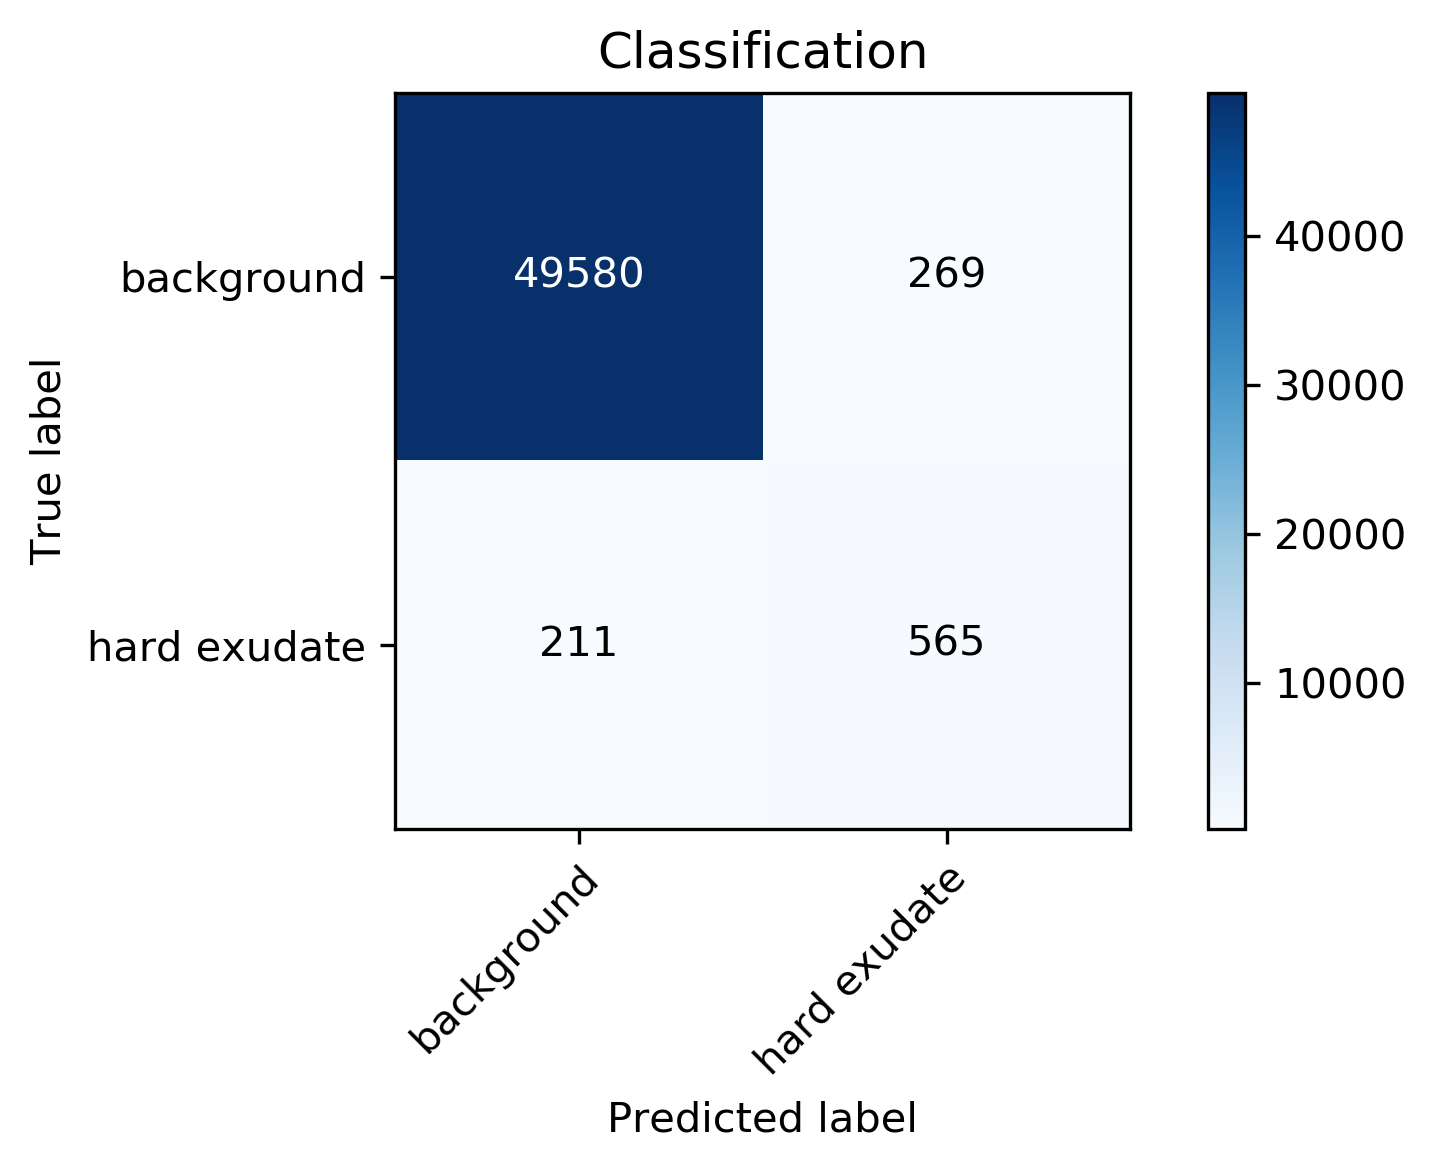

In [88]:
location = "outputs/task1/softexudates"
i = 4
with open(path.join(location, f"test{i}_softexudates_2streak100epochs.sav"), "rb") as saved:
    result_dict = pkl.load(saved)
    evaluate(result_dict, location, i)
    dict_m = get_metrics(result_dict, ["background", "soft_exudates"])
    print(dict_m)